# Import Warnings

In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Import Packages

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

import io
import os
import tensorflow as tf

from PIL import Image
from glob import glob
import itertools

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import os

import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from itertools import islice

from sklearn.utils import shuffle as skf
import keras

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, Dropout, Dense, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras import layers
from keras import models
from keras import optimizers
from keras import backend as K

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from IPython.display import display
#To see the value of multiple statements at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn import datasets

from keras.callbacks import EarlyStopping
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout
from numpy import dstack


# Preparing data for train,test,validation

In [ ]:
%%capture
!unzip /content/gdrive/MyDrive/HAM_test_data.zip

In [ ]:
%%capture
!unzip /content/gdrive/MyDrive/Data/HAM_val_data.zip

In [ ]:
%%capture
!unzip /content/gdrive/MyDrive/Data/HAM_train_data.zip

In [ ]:
# src_path_train = "/content/HAM_train_data"
src_path_test="/content/HAM_test_data"
# src_path_val="/content/HAM_val_data"


train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'nearest')


test_datagen=ImageDataGenerator(rescale=1/255.0)

batch_size = 64
# train_generator = train_datagen.flow_from_directory(

#     directory=src_path_train,
#     target_size=(75,75),
#     batch_size=batch_size,
#     color_mode="rgb",
#     class_mode="categorical",
#     shuffle=True
# )

# valid_generator = test_datagen.flow_from_directory(
#         directory=src_path_val,
#         target_size=(75, 75),
#         batch_size=64,
#         color_mode="rgb",
#         shuffle=True,
#         class_mode="categorical"
# )

test_generator=test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(75,75),
    batch_size=64,
    color_mode="rgb",
    shuffle=False,
    class_mode="categorical",
)


Found 8344 images belonging to 7 classes.


In [ ]:
num_of_train_samples = 27873
num_of_val_samples= 6671
num_of_test_samples = 8344

In [ ]:
import os

directory_path = src_path_train

subdirectory_image_count = {}

for subdir in os.listdir(directory_path):
    subdir_path = os.path.join(directory_path, subdir)
    if os.path.isdir(subdir_path):
        image_count = len([file for file in os.listdir(subdir_path) if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))])
        subdirectory_image_count[subdir] = image_count

for subdir, count in subdirectory_image_count.items():
    print(f"Subdirectory '{subdir}' contains {count} images.")


Subdirectory 'akiec' contains 4141 images.
Subdirectory 'nv' contains 4560 images.
Subdirectory 'bcc' contains 3521 images.
Subdirectory 'df' contains 3016 images.
Subdirectory 'mel' contains 4236 images.
Subdirectory 'vasc' contains 4169 images.
Subdirectory 'bkl' contains 4230 images.


In [ ]:
import os

directory_path = src_path_test

subdirectory_image_count = {}

for subdir in os.listdir(directory_path):
    subdir_path = os.path.join(directory_path, subdir)
    if os.path.isdir(subdir_path):
        image_count = len([file for file in os.listdir(subdir_path) if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))])
        subdirectory_image_count[subdir] = image_count

for subdir, count in subdirectory_image_count.items():
    print(f"Subdirectory '{subdir}' contains {count} images.")


Subdirectory 'akiec' contains 1192 images.
Subdirectory 'nv' contains 1192 images.
Subdirectory 'bcc' contains 1192 images.
Subdirectory 'df' contains 1192 images.
Subdirectory 'mel' contains 1192 images.
Subdirectory 'vasc' contains 1192 images.
Subdirectory 'bkl' contains 1192 images.


In [ ]:
import os

directory_path = src_path_val

subdirectory_image_count = {}

for subdir in os.listdir(directory_path):
    subdir_path = os.path.join(directory_path, subdir)
    if os.path.isdir(subdir_path):
        image_count = len([file for file in os.listdir(subdir_path) if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))])
        subdirectory_image_count[subdir] = image_count

for subdir, count in subdirectory_image_count.items():
    print(f"Subdirectory '{subdir}' contains {count} images.")


Subdirectory 'akiec' contains 953 images.
Subdirectory 'nv' contains 953 images.
Subdirectory 'bcc' contains 953 images.
Subdirectory 'df' contains 953 images.
Subdirectory 'mel' contains 953 images.
Subdirectory 'vasc' contains 953 images.
Subdirectory 'bkl' contains 953 images.


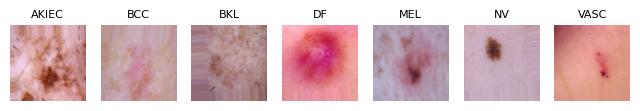

In [ ]:


# get one image from each class
class_indices = train_generator.class_indices
num_classes = len(class_indices)
sample_images = {}
for class_name, class_idx in class_indices.items():
    # get one image from the class
    found = False
    while not found:
        batch = train_generator.next()
        images, labels = batch
        class_mask = labels[:, class_idx] == 1
        class_images = images[class_mask]
        if len(class_images) > 0:
            sample_images[class_name] = class_images[0]
            found = True

# plot the sample images
fig, axes = plt.subplots(1, num_classes, figsize=(8, 6))
for i, (class_name, image) in enumerate(sample_images.items()):
    axes[i].imshow(image)
    axes[i].set_title(class_name.upper(),fontsize = 8)
    axes[i].axis('off')
plt.show();


In [ ]:
import matplotlib.pyplot as plt

class_indices = train_generator.class_indices
num_classes = len(class_indices)
sample_images = {}

for class_name, class_idx in class_indices.items():
    found = False
    while not found:
        batch = train_generator.next()
        images, labels = batch
        class_mask = labels[:, class_idx] == 1
        class_images = images[class_mask]
        if len(class_images) > 0:
            sample_images[class_name] = class_images[0]
            found = True

fig, axes = plt.subplots(num_classes, 1, figsize=(5, 15))
for i, (class_name, image) in enumerate(sample_images.items()):
    axes[i].imshow(image)
    axes[i].set_title(class_name.upper(), y=-0.15)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# ResNet152V2 Model

In [ ]:
import tensorflow as tf
base_model=tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
    input_shape=(75,75,3)
)


for layer in base_model.layers[:427]:
    layer.trainable=False


temp_model=tf.keras.models.Sequential()
temp_model.add(base_model)
temp_model.summary()



234545216/234545216 [==============================] - 7s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 3, 3, 2048)        58331648  
                                                                 
Total params: 58,331,648
Trainable params: 25,034,752
Non-trainable params: 33,296,896
_________________________________________________________________


# Xception Model

In [ ]:
import tensorflow as tf
base_model=tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(75,75,3)
)


for layer in base_model.layers[:72]:
    layer.trainable=False


temp_model=tf.keras.models.Sequential()
temp_model.add(base_model)
temp_model.summary()



83683744/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
Total params: 20,861,480
Trainable params: 13,782,280
Non-trainable params: 7,079,200
_________________________________________________________________


# InceptionResNetV2

In [ ]:
import tensorflow as tf
base_model=tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(75,75,3)
)


for layer in base_model.layers[:553]:
    layer.trainable=False



temp_model=tf.keras.models.Sequential()
temp_model.add(base_model)
temp_model.summary()



219055592/219055592 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1, 1, 1536)       54336736  
 onal)                                                           
                                                                 
Total params: 54,336,736
Trainable params: 30,516,352
Non-trainable params: 23,820,384
_________________________________________________________________


# ResNet101V2 Model


In [ ]:
import tensorflow as tf
base_model=tf.keras.applications.ResNet101V2(
    include_top=False,
    weights="imagenet",
    input_shape=(75,75,3)
)


for layer in base_model.layers[:292]:
    layer.trainable=False


temp_model=tf.keras.models.Sequential()
temp_model.add(base_model)
temp_model.summary()



171317808/171317808 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 3, 3, 2048)        42626560  
                                                                 
Total params: 42,626,560
Trainable params: 19,707,392
Non-trainable params: 22,919,168
_________________________________________________________________


# ResNet50V2 Model


In [ ]:
import tensorflow as tf
base_model=tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(75,75,3)
)

# count=0
for layer in bas_model.layers[:148]:
    layer.trainable=False


temp_model=tf.keras.models.Sequential()
temp_model.add(bas_model)
temp_model.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 3, 3, 2048)        23564800  
                                                                 
Total params: 23,564,800
Trainable params: 15,824,384
Non-trainable params: 7,740,416
_________________________________________________________________


# Feed Forward Network-The Classifier

In [ ]:
model=Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(7, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(loss = 'categorical_crossentropy',
                 optimizer = optimizer,
                  metrics =['Accuracy','AUC','Precision','Recall'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 3, 3, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                65600     
                                                      

In [ ]:
history=model.fit_generator(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=50)

Epoch 1/50
435/435 [==============================] - 262s 500ms/step - loss: 1.1348 - Accuracy: 0.5720 - auc: 0.8912 - precision: 0.7312 - recall: 0.3986 - val_loss: 1.1934 - val_Accuracy: 0.5766 - val_auc: 0.8917 - val_precision: 0.6611 - val_recall: 0.4651
Epoch 2/50
435/435 [==============================] - 185s 424ms/step - loss: 0.8367 - Accuracy: 0.6840 - auc: 0.9413 - precision: 0.7734 - recall: 0.5720 - val_loss: 0.7222 - val_Accuracy: 0.7324 - val_auc: 0.9566 - val_precision: 0.8271 - val_recall: 0.6203
Epoch 3/50
435/435 [==============================] - 172s 395ms/step - loss: 0.7182 - Accuracy: 0.7310 - auc: 0.9563 - precision: 0.8049 - recall: 0.6432 - val_loss: 0.5828 - val_Accuracy: 0.7816 - val_auc: 0.9714 - val_precision: 0.8436 - val_recall: 0.7115
Epoch 4/50
435/435 [==============================] - 193s 444ms/step - loss: 0.6357 - Accuracy: 0.7652 - auc: 0.9653 - precision: 0.8272 - recall: 0.6950 - val_loss: 0.5297 - val_Accuracy: 0.8026 - val_auc: 0.9754 - val

In [ ]:
history

In [ ]:
history_df_res_152 = pd.DataFrame(history.history)
history_df_res_152.to_csv('/content/gdrive/MyDrive/training_history_res_152.csv', index=False)


# Evaluation of Models

In [ ]:
y_test = test_generator.classes

Y_preds = model.predict_generator(test_generator, num_of_test_samples // batch_size+1,workers=0)
Y_pred = np.argmax(Y_preds, axis=1)

In [ ]:
history.history = pd.read_csv('/content/gdrive/MyDrive/training_history_res_50.csv')
history.history

In [ ]:
history = pd.read_csv('/content/gdrive/MyDrive/training_history_res_50.csv')

In [ ]:
history

,loss,Accuracy,auc,precision,recall,val_loss,val_Accuracy,val_auc,val_precision,val_recall
0,1.144946,0.569636,0.889326,0.734001,0.392643,0.846012,0.687500,0.940069,0.776521,0.598257
1,0.882004,0.672696,0.934801,0.773264,0.555791,0.742694,0.720703,0.953587,0.802476,0.623197
2,0.757822,0.720127,0.951521,0.797570,0.625517,0.715611,0.736478,0.956671,0.804564,0.667368
3,0.680771,0.743932,0.960551,0.810409,0.669100,0.602596,0.783804,0.968399,0.825847,0.743089
4,0.616737,0.770074,0.967131,0.826369,0.704772,0.531235,0.799880,0.974899,0.838407,0.765475
5,0.573290,0.787838,0.971601,0.836481,0.731022,0.501108,0.818359,0.977708,0.854385,0.771334
6,0.521379,0.805746,0.975982,0.850034,0.758028,0.539568,0.801532,0.974300,0.844073,0.759615
7,0.483923,0.820921,0.979117,0.860009,0.781366,0.399580,0.853966,0.985318,0.877776,0.825421
8,0.447611,0.836420,0.981885,0.870052,0.802222,0.436623,0.846304,0.982412,0.865611,0.829327
9,0.426312,0.845230,0.983384,0.874482,0.812471,0.365890,0.867939,0.987307,0.888714,0.848257


Text(0.5, 0, 'Number of Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'ResNet152V2 Model Accuracy')

Text(0.5, 0, 'Number of Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Model Loss')

Text(0.5, 0, 'Predicted labels')

Text(0, 0.5, 'True labels')

Text(0.5, 1.0, 'Confusion Matrix')

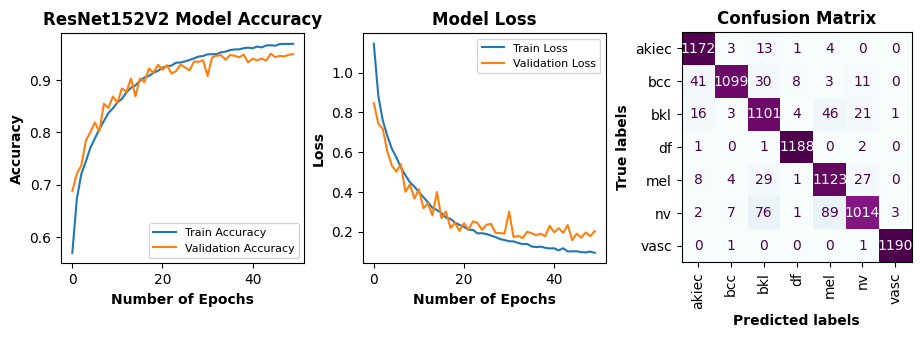

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
plt_epochs = list(range(50))

#Calculating the accuracy
acc = history['Accuracy']
val_acc = history['val_Accuracy']

#Calculating the loss
loss = history['loss']
val_loss = history['val_loss']

#setting the size of the figures
fig, ax = plt.subplots(1,3,figsize=(5, 0.1))

#plotting the accuracy
ax[0].plot(plt_epochs, acc, label='Train Accuracy')
ax[0].plot(plt_epochs, val_acc, label='Validation Accuracy')
ax[0].set_xlabel('Number of Epochs',weight='bold')
ax[0].set_ylabel('Accuracy',weight='bold')
ax[0].set_title('ResNet152V2 Model Accuracy',weight='bold')
ax[0].legend()
ax[0].legend(prop={'size': 8})

#plotting the loss
ax[1].plot(plt_epochs, loss, label='Train Loss')
ax[1].plot(plt_epochs, val_loss, label='Validation Loss')
ax[1].set_xlabel('Number of Epochs',weight='bold')
ax[1].set_ylabel('Loss',weight='bold')
ax[1].set_title('Model Loss',weight='bold')
ax[1].legend()
ax[1].legend(prop={'size': 8})

# confusion matrix

cm1 = [[238,2],
      [3,181]]

cm1= np.array(cm1)
label_names = ['Fetus','Mother']
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=label_names)
disp1.plot(ax=ax[2],xticks_rotation='vertical',cmap='BuPu')
disp1.im_.colorbar.remove()
fig = disp1.ax_.get_figure()
fig.set_figwidth(9)
fig.set_figheight(2.3)
ax[2].set_xlabel('Predicted labels',weight='bold')
ax[2].set_ylabel('True labels',weight='bold')
ax[2].set_title('Confusion Matrix',weight='bold')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax0 = ax[0].get_position()
ax1 = ax[1].get_position()
ax2 = ax[2].get_position()
# ax[2].set_xticks(weight = 'bold')
ax[0].set_position([ax0.x0,ax0.y0,.27,1])
ax[1].set_position([.46,ax1.y0,.27,1])
ax[2].set_position([.8,ax2.y0,.27,1])
plt.show()

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/convnext_history_with_specaug.csv')
history

,train_accuracy,train_loss,test_accuracy,test_losses
0,0.931604,0.255033,0.986111,0.077982
1,0.990567,0.040150,0.986111,0.066952
2,0.994694,0.021192,0.993055,0.041211
3,0.995284,0.016267,0.993055,0.017244
4,0.997053,0.010973,0.995370,0.020094
5,0.997053,0.006765,0.988426,0.058235
6,0.992925,0.040862,0.990741,0.026226
7,0.996463,0.015282,0.995370,0.024606
8,0.997642,0.012671,0.995370,0.011410
9,0.999411,0.001195,0.995370,0.015054


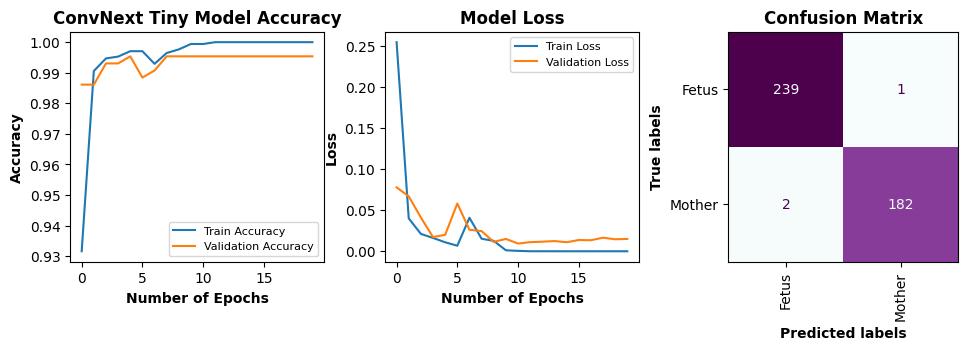

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt_epochs = list(range(20))

#Calculating the accuracy
acc = history['train_accuracy']
val_acc = history['test_accuracy']

#Calculating the loss
loss = history['train_loss']
val_loss = history['test_losses']

#setting the size of the figures
fig, ax = plt.subplots(1,3,figsize=(5, 0.1))

#plotting the accuracy
ax[0].plot(plt_epochs, acc, label='Train Accuracy')
ax[0].plot(plt_epochs, val_acc, label='Validation Accuracy')
ax[0].set_xlabel('Number of Epochs',weight='bold')
ax[0].set_ylabel('Accuracy',weight='bold')
ax[0].set_title('ConvNext Tiny Model Accuracy',weight='bold')
ax[0].legend()
ax[0].legend(prop={'size': 8})

#plotting the loss
ax[1].plot(plt_epochs, loss, label='Train Loss')
ax[1].plot(plt_epochs, val_loss, label='Validation Loss')
ax[1].set_xlabel('Number of Epochs',weight='bold')
ax[1].set_ylabel('Loss',weight='bold')
ax[1].set_title('Model Loss',weight='bold')
ax[1].legend()
ax[1].legend(prop={'size': 8})

# confusion matrix

cm1 = [[239,1],
      [2,182]]
label_names = ['Fetus','Mother']

cm1= np.array(cm1)
# label_names = ['akiec','bcc','bkl','df','mel','nv','vasc']
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=label_names)
disp1.plot(ax=ax[2],xticks_rotation='vertical',cmap='BuPu')
disp1.im_.colorbar.remove()
fig = disp1.ax_.get_figure()
fig.set_figwidth(9.4)
fig.set_figheight(2.3)
ax[2].set_xlabel('Predicted labels',weight='bold')
ax[2].set_ylabel('True labels',weight='bold')
ax[2].set_title('Confusion Matrix',weight='bold')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax0 = ax[0].get_position()
ax1 = ax[1].get_position()
ax2 = ax[2].get_position()
# ax[2].set_xticks(weight = 'bold')
ax[0].set_position([ax0.x0,ax0.y0,.27,1])
ax[1].set_position([.46,ax1.y0,.27,1])
ax[2].set_position([.8,ax2.y0,.27,1])
plt.show()

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/deepvit_history_with_specaug.csv')
history

,train_accuracy,train_loss,test_accuracy,test_losses
0,0.908609,0.200158,0.962963,0.097900
1,0.979363,0.061659,0.974537,0.077744
2,0.991746,0.033030,0.981481,0.075814
3,0.987619,0.041672,0.981481,0.051530
4,0.992925,0.021614,0.981481,0.064048
5,0.989387,0.029899,0.986111,0.029305
6,0.988208,0.028298,0.993055,0.027073
7,0.998822,0.005927,0.990741,0.027640
8,0.991746,0.016778,0.990741,0.028352
9,0.997053,0.008364,0.995370,0.030282


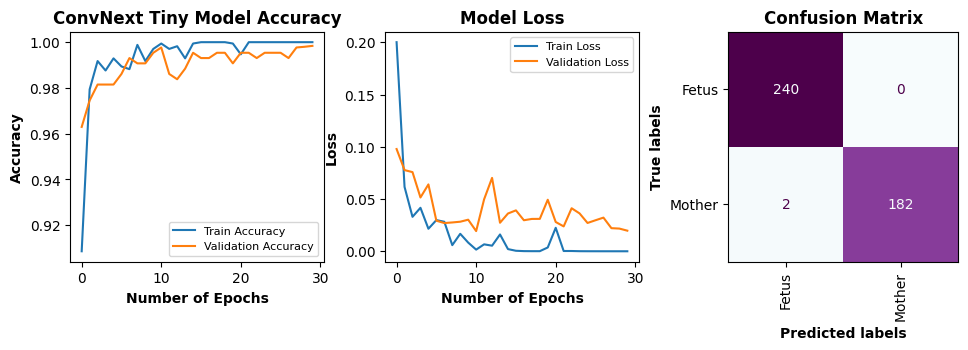

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt_epochs = list(range(30))

#Calculating the accuracy
acc = history['train_accuracy']
val_acc = history['test_accuracy']

#Calculating the loss
loss = history['train_loss']
val_loss = history['test_losses']

#setting the size of the figures
fig, ax = plt.subplots(1,3,figsize=(5, 0.1))

#plotting the accuracy
ax[0].plot(plt_epochs, acc, label='Train Accuracy')
ax[0].plot(plt_epochs, val_acc, label='Validation Accuracy')
ax[0].set_xlabel('Number of Epochs',weight='bold')
ax[0].set_ylabel('Accuracy',weight='bold')
ax[0].set_title('ConvNext Tiny Model Accuracy',weight='bold')
ax[0].legend()
ax[0].legend(prop={'size': 8})

#plotting the loss
ax[1].plot(plt_epochs, loss, label='Train Loss')
ax[1].plot(plt_epochs, val_loss, label='Validation Loss')
ax[1].set_xlabel('Number of Epochs',weight='bold')
ax[1].set_ylabel('Loss',weight='bold')
ax[1].set_title('Model Loss',weight='bold')
ax[1].legend()
ax[1].legend(prop={'size': 8})

# confusion matrix

cm1 = [[240,0],
      [2,182]]
label_names = ['Fetus','Mother']

cm1= np.array(cm1)
# label_names = ['akiec','bcc','bkl','df','mel','nv','vasc']
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=label_names)
disp1.plot(ax=ax[2],xticks_rotation='vertical',cmap='BuPu')
disp1.im_.colorbar.remove()
fig = disp1.ax_.get_figure()
fig.set_figwidth(9.4)
fig.set_figheight(2.3)
ax[2].set_xlabel('Predicted labels',weight='bold')
ax[2].set_ylabel('True labels',weight='bold')
ax[2].set_title('Confusion Matrix',weight='bold')
ax[2].grid()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax0 = ax[0].get_position()
ax1 = ax[1].get_position()
ax2 = ax[2].get_position()
# ax[2].set_xticks(weight = 'bold')
ax[0].set_position([ax0.x0,ax0.y0,.27,1])
ax[1].set_position([.46,ax1.y0,.27,1])
ax[2].set_position([.8,ax2.y0,.27,1])
plt.show()

In [ ]:

import keras
from matplotlib import pyplot as plt

plt.subplots(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('ResNet152V2 Model Accuracy',weight = 'bold')
plt.ylabel('Accuracy',weight = 'bold')
plt.xlabel('Number of Epochs',weight = 'bold')
plt.legend(['Train_Acc', 'Val_Acc'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet152V2 Model Loss',weight = 'bold')
plt.ylabel('Loss',weight = 'bold')
plt.xlabel('Number of Epochs',weight = 'bold')
plt.legend(['Train_Loss', 'Val_Loss'], loc='upper left')
plt.show()


In [ ]:
y_test = np.array(test_generator.classes)[test_generator.index_array]

Y_preds = model.predict_generator(test_generator, num_of_test_samples // batch_size+1,workers=0)
Y_pred = np.argmax(Y_preds, axis=1)

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

output_vectors = np.array([softmax(vector) for vector in Y_preds])
print(output_vectors[0])

scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_test, output_vectors).numpy()

[0.3117904  0.11470164 0.11470156 0.11470156 0.11470171 0.11470155
 0.11470155]


1.2236445

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

lesion_type_dict = {
    'nv': 'Melanocytic nevi (nv)',
    'mel': 'Melanoma (mel)',
    'bkl': 'Benign keratosis-like lesions (bkl)',
    'bcc': 'Basal cell carcinoma (bcc)',
    'akiec': 'Actinic keratoses (akiec)',
    'vasc': 'Vascular lesions (vasc)',
    'df': 'Dermatofibroma (df)'
}
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, Y_pred))
print("                                                                        ")
print('Classification Report using ResNet50V2')
target_names = ['nv', 'mel', 'bkl','bcc','akiec','vasc','df']
print(classification_report(test_generator.classes, Y_pred, target_names=target_names))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



labels = ['nv', 'mel', 'bkl','bcc','akiec','vasc','df']


cm = confusion_matrix(y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix using InceptionResNetV2')
plt.show()
print('==========================================================')


In [ ]:


cm = confusion_matrix(y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion Matrix using Xception')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show(block=False)

In [ ]:
import sklearn
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(f1_score(y_test, Y_pred,average='weighted'))
print(precision_score(y_test, Y_pred,average='weighted'))
print(recall_score(y_test, Y_pred,average='weighted'))
print(accuracy_score(y_test, Y_pred))

0.9450981833729772
0.9464084582677131
0.9452301054650047
0.9452301054650047


In [ ]:
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_test, Y_pred)

In [ ]:
!mkdir /content/gdrive/MyDrive/Saved_models_ham

In [ ]:
#saving the model
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/Saved_models_ham/res152_new_2.h5')



# Ensemble Models





- Ensemble Model A- list models
- Ensemble Model B- list models_2
- Ensemble Model C- list models_3

Trying 3 ensembles with keeping Xception and InceptionResnetv2 common hence permutating the three pretrained models of ResNetV2 family.


## Loading the pretrained models

In [ ]:
from tensorflow.keras.models import load_model

res_50 = load_model('/content/gdrive/MyDrive/HAM_10000_Results_final/Trained_Models/res_50_new.h5')
res_101 = load_model('/content/gdrive/MyDrive/HAM_10000_Results_final/Trained_Models/res101_new.h5')
res_152 = load_model('/content/gdrive/MyDrive/HAM_10000_Results_final/Trained_Models/res152_new_2.h5')
incep_res = load_model('/content/gdrive/MyDrive/HAM_10000_Results_final/Trained_Models/incepres_new_2.h5')
xcep = load_model('/content/gdrive/MyDrive/HAM_10000_Results_final/Trained_Models/xcp_96_new.h5')

#model A
models=list()
models.append(res_50)
models.append(res_101)
models.append(res_152)
models.append(incep_res)
models.append(xcep)



#model B
models_2=list()
models_2.append(res_101)
models_2.append(incep_res)
models_2.append(xcep)

#model B
models_3=list()
models_3.append(res_152)
models_3.append(incep_res)
models_3.append(xcep)

In [ ]:
models=list()
models

[]

In [ ]:
models.append(res_50)
models.append(res_101)
models.append(res_152)
models.append(incep_res)
models.append(xcep)
models

In [ ]:
preds = []

In [ ]:
preds=[model.predict_generator(test_generator, num_of_test_samples// batch_size+1,workers=0) for model in models]
preds = np.array(preds)
preds.shape

(5, 8344, 7)

In [ ]:
preds = preds.transpose((1, 0, 2))
preds.shape

(8344, 5, 7)

In [ ]:
predictions_2d = preds.reshape(-1, preds.shape[1])
# Calculate correlation matrix
correlation_matrix = np.corrcoef(predictions_2d, rowvar=False)

# Print correlation matrix
print("Correlation matrix shape:", correlation_matrix.shape)
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix shape: (5, 5)
Correlation matrix:
[[ 1.         -0.16450502 -0.16885489 -0.16510069 -0.16062096]
 [-0.16450502  1.         -0.16680799 -0.16747733 -0.16787404]
 [-0.16885489 -0.16680799  1.         -0.16760305 -0.16830651]
 [-0.16510069 -0.16747733 -0.16760305  1.         -0.16643608]
 [-0.16062096 -0.16787404 -0.16830651 -0.16643608  1.        ]]


In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Model Predictions')
plt.xlabel('Models')
plt.ylabel('Models')
plt.xticks(np.arange(preds.shape[1]), np.arange(1, preds.shape[1] + 1))
plt.yticks(np.arange(preds.shape[1]), np.arange(1, preds.shape[1] + 1))
plt.show()

In [ ]:

num_instances = 8344
num_models = 5

predictions_flat = preds.reshape(num_models, -1)

correlation_matrix = np.corrcoef(predictions_flat, rowvar=False)

selected_models = []
remaining_models = set(range(num_models))

model_with_max_avg_corr = np.mean(correlation_matrix, axis=1).argmax()
selected_models.append(model_with_max_avg_corr)
remaining_models.remove(model_with_max_avg_corr)

while len(selected_models) < 3:
    lowest_corr = np.inf
    best_model = None
    for model in remaining_models:
        avg_corr_with_selected = np.mean(correlation_matrix[model, selected_models])
        if avg_corr_with_selected < lowest_corr:
            lowest_corr = avg_corr_with_selected
            best_model = model
    selected_models.append(best_model)
    remaining_models.remove(best_model)

print("Selected models for stacking ensembling based on correlation analysis:")
for model in selected_models:
    print(f"Model_{model+1}")

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of Model Predictions')
plt.xticks(ticks=np.arange(num_models), labels=[f'Model_{i+1}' for i in range(num_models)], rotation=45)
plt.yticks(ticks=np.arange(num_models), labels=[f'Model_{i+1}' for i in range(num_models)])
plt.tight_layout()
plt.show()

In [ ]:
y_test = np.array(test_generator.classes)[test_generator.index_array]
preds_3=[model.predict_generator(test_generator, num_of_test_samples// batch_size+1,workers=0) for model in models]
preds_3=np.array(preds_3)
print(preds_3.shape)
summed_3=np.sum(preds_3,axis=0)
print(summed_3.shape)

ensemble_prediction_3=np.argmax(summed_3,axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, ensemble_prediction_3))
print('                                                     ')
print('Classification Report using Ensemble Model C')
target_names = ['nv', 'mel', 'bkl','bcc','akiec','vasc','df']
print(classification_report(test_generator.classes, ensemble_prediction_3, target_names=target_names))

(3, 8344, 7)
(8344, 7)
Confusion Matrix
[[1191    0    1    0    0    0    0]
 [   1 1185    2    0    1    3    0]
 [   3    1 1165    0   12   11    0]
 [   0    0    0 1191    0    1    0]
 [   1    0    4    0 1169   18    0]
 [   2    3   49    6   47 1081    4]
 [   0    0    0    0    0    0 1192]]
                                                     
Classification Report using Ensemble Model C
              precision    recall  f1-score   support

          nv       0.99      1.00      1.00      1192
         mel       1.00      0.99      1.00      1192
         bkl       0.95      0.98      0.97      1192
         bcc       0.99      1.00      1.00      1192
       akiec       0.95      0.98      0.97      1192
        vasc       0.97      0.91      0.94      1192
          df       1.00      1.00      1.00      1192

    accuracy                           0.98      8344
   macro avg       0.98      0.98      0.98      8344
weighted avg       0.98      0.98      0.98      834

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtracting the maximum value for numerical stability
    return e_x / e_x.sum(axis=0)

output_vectors = np.array([softmax(vector) for vector in summed_3])
print(output_vectors[0])

# Using 'auto'/'sum_over_batch_size' reduction type.
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(test_generator.classes, output_vectors).numpy()

array([0.7688231 , 0.03852961, 0.03859734, 0.03849344, 0.03856171,
       0.03850135, 0.03849335], dtype=float32)

In [ ]:

# Using 'auto'/'sum_over_batch_size' reduction type.
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(test_generator.classes, output_vectors).numpy()

0.34214222

In [ ]:
print('Classification Report using Ensemble Model C')
target_names = ['nv', 'mel', 'bkl','bcc','akiec','vasc','df']
print(classification_report(test_generator.classes, ensemble_prediction_3, target_names=target_names))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(test_generator.classes, ensemble_prediction_3)
labels = ['nv', 'mel', 'bkl','bcc','akiec','vasc','df']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix using Ensemble Model C')
plt.show()
print('==========================================================')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_generator.classes, ensemble_prediction_3)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.title(' Normalized Confusion Matrix using Ensemble Model C')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show(block=False)

In [ ]:
import sklearn
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(f1_score(test_generator.classes, ensemble_prediction_3,average='weighted'))
print(precision_score(test_generator.classes, ensemble_prediction_3,average='weighted'))
print(recall_score(test_generator.classes, ensemble_prediction_3,average='weighted'))
print(accuracy_score(test_generator.classes, ensemble_prediction_3))